In [17]:
# Product Case study----viagogo
#I_Lin Liu/ 2019/07/02

In [1]:
import pandas as pd
import numpy as np
#import dateutil
from pandas import Series
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel (r'C:\Users\ilinl\Desktop\Product_Case_Data\ProductCase.xlsx')
#data['date'] = data['date'].apply(dateutil.parser.parse, dayfirst = True)

In [3]:
data.head(10)

,Date,Channel,User Type,Land,Bounce,Purchase,Visitors_Control,Visitors_Variant
0,2014-10-10,Affiliate,Returning User,0,0,0,1211,1175
1,2014-10-10,Affiliate,Returning User,1,0,0,4076,4810
2,2014-10-10,Affiliate,Returning User,1,1,0,2766,3386
3,2014-10-10,Affiliate,Returning User,0,0,1,196,159
4,2014-10-10,Affiliate,Returning User,1,0,1,358,332
5,2014-10-10,Affiliate,New User,0,0,0,1589,1574
6,2014-10-10,Affiliate,New User,1,0,0,7165,6501
7,2014-10-10,Affiliate,New User,1,1,0,4709,4211
8,2014-10-10,Affiliate,New User,0,0,1,132,150
9,2014-10-10,Affiliate,New User,1,0,1,640,694


In [34]:
data.shape

(1260, 8)

In [4]:
data.describe()

,Land,Bounce,Purchase,Visitors_Control,Visitors_Variant
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,0.600000,0.200000,0.400000,2378.045238,2417.343651
std,0.490092,0.400159,0.490092,3218.435287,3270.830372
min,0.000000,0.000000,0.000000,30.000000,25.000000
25%,0.000000,0.000000,0.000000,265.500000,260.250000
50%,1.000000,0.000000,0.000000,1091.500000,1070.000000
75%,1.000000,0.000000,1.000000,2993.750000,2995.500000
max,1.000000,1.000000,1.000000,19938.000000,19045.000000


The difference of the conversion rate between Variant and Control groups:
Date
2014-10-10   -0.001720
2014-10-11   -0.003140
2014-10-12   -0.002491
2014-10-13   -0.002702
2014-10-14   -0.003540
2014-10-15   -0.001982
2014-10-16   -0.001934
2014-10-17   -0.001434
2014-10-18    0.000979
2014-10-19   -0.002427
2014-10-20   -0.001753
2014-10-21   -0.002073
2014-10-22   -0.001980
2014-10-23   -0.002296
2014-10-24   -0.001447
2014-10-25   -0.004528
2014-10-26   -0.002934
2014-10-27   -0.003112
2014-10-28   -0.002275
2014-10-29   -0.001505
2014-10-30   -0.003785
dtype: float64
The margiin of two-tail(5%) of the conversion rate between Control and Variant groups:
Date
2014-10-10    0.001825
2014-10-11    0.001443
2014-10-12    0.001748
2014-10-13    0.001672
2014-10-14    0.001519
2014-10-15    0.001490
2014-10-16    0.001370
2014-10-17    0.001750
2014-10-18    0.002199
2014-10-19    0.001858
2014-10-20    0.001658
2014-10-21    0.001627
2014-10-22    0.001426
2014-10-23    0.001536
2014-10-2

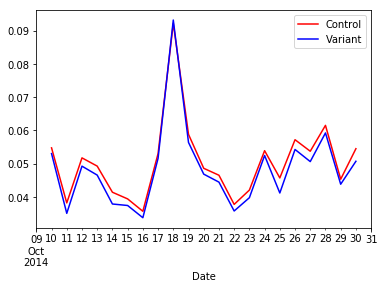

In [5]:
#cclculate the conversion rate
Visitor_H_Control_date = data[data.Land == 1].groupby('Date')['Visitors_Control'].sum()
Visitor_H_Variant_date = data[data.Land == 1].groupby('Date')['Visitors_Variant'].sum()
Purchase_H_Control = data[(data.Land == 1)&(data.Purchase == 1)].groupby(['Date'])['Visitors_Control'].sum()
Purchase_H_Variant = data[(data.Land == 1)&(data.Purchase == 1)].groupby(['Date'])['Visitors_Variant'].sum()
P_Purchase_H_Control = Purchase_H_Control/Visitor_H_Control_date
P_Purchase_H_Variant = Purchase_H_Variant/Visitor_H_Variant_date
P_sumHControlVariant = ((Purchase_H_Control+Purchase_H_Variant)/(Visitor_H_Control_date+Visitor_H_Variant_date))
SE_sumHControlVariant = np.sqrt(P_sumHControlVariant*(1.0-P_sumHControlVariant)*(Visitor_H_Control_date+Visitor_H_Variant_date)
                               /(Visitor_H_Control_date*Visitor_H_Variant_date))
delPpool = P_Purchase_H_Variant-P_Purchase_H_Control
print ( 'The difference of the conversion rate between Variant and Control groups:')
print (delPpool)
print ( 'The margiin of two-tail(5%) of the conversion rate between Control and Variant groups:')
print (1.96*SE_sumHControlVariant)
print ( 'The defference of the real difference(Control & Variant) and margin(5% tails):')
print (-delPpool-1.96*SE_sumHControlVariant)
print ((-delPpool-1.96*SE_sumHControlVariant).describe())
#print
print ('Probility of purchase in control group:')
print (P_Purchase_H_Control.describe())
print ('Conversion rate in Control group:',0.05056-1.96*0.012084,'-', 0.05056+1.96*0.012084)
#print("\n")
print ('Probility of purchase in variant group:')
print (P_Purchase_H_Variant.describe())
P_Purchase_H_Control.plot(color='red',label='Control') 

P_Purchase_H_Variant.plot(color='blue',label ='Variant')#(kind ='bar', stacked = True)

print ('Conversion rate in Variant group:',0.04827-1.96*0.012715, '-',0.04827+1.96*0.012715)
plt.legend()
plt.show()

Total amounty of purchase in control group:
count       21.000000
mean      6258.380952
std       1567.031604
min       4847.000000
25%       5382.000000
50%       6166.000000
75%       6516.000000
max      12351.000000
Name: Visitors_Control, dtype: float64
Total amounty of purchase in variant group:
count       21.000000
mean      6078.809524
std       1635.266847
min       4633.000000
25%       5086.000000
50%       5930.000000
75%       6316.000000
max      12431.000000
Name: Visitors_Variant, dtype: float64
count     21.000000
mean     179.571429
std      129.318820
min      -80.000000
25%      101.000000
50%      168.000000
75%      276.000000
max      455.000000
dtype: float64


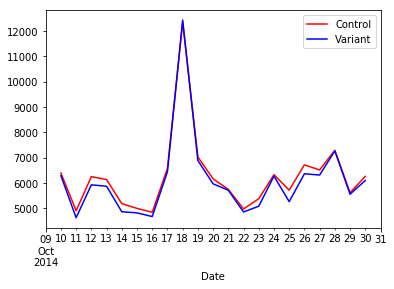

In [6]:
#calculate the aggragate difference
Visitor_H_Control_date = data[data.Land == 1].groupby('Date')['Visitors_Control'].sum()
Visitor_H_Variant_date = data[data.Land == 1].groupby('Date')['Visitors_Variant'].sum()
Purchase_H_Control = data[(data.Land == 1)&(data.Purchase == 1)].groupby(['Date'])['Visitors_Control'].sum()
Purchase_H_Variant = data[(data.Land == 1)&(data.Purchase == 1)].groupby(['Date'])['Visitors_Variant'].sum()

print ('Total amounty of purchase in control group:')
print (Purchase_H_Control.describe())
print ('Total amounty of purchase in variant group:')
print (Purchase_H_Variant.describe())
print ((Purchase_H_Control-Purchase_H_Variant).describe())
Purchase_H_Control.plot(color='red',label='Control') 

Purchase_H_Variant.plot(color='blue',label ='Variant')
plt.legend()
plt.show()

conversion rate from returning user and New user in control group:
User Type   New User  Returning User
count      21.000000       21.000000
mean        0.028784        0.021776
std         0.006185        0.006110
min         0.019606        0.015556
25%         0.024338        0.017714
50%         0.028077        0.021499
75%         0.031813        0.023421
max         0.047919        0.044312


conversion rate from returning user and New user  in variant group:
User Type   New User  Returning User
count      21.000000       21.000000
mean        0.028430        0.019840
std         0.006462        0.006626
min         0.018820        0.013681
25%         0.023209        0.015422
50%         0.027732        0.018850
75%         0.031954        0.021808
max         0.047981        0.045229


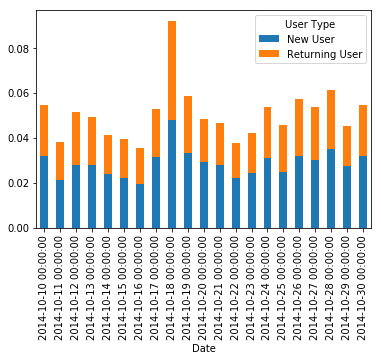

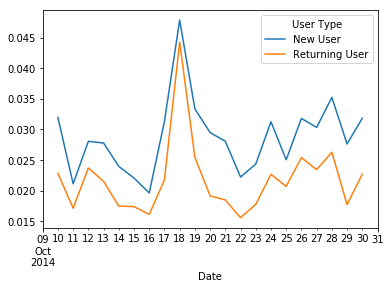

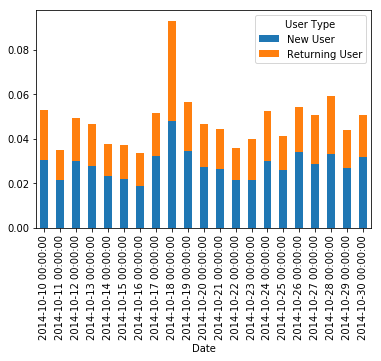

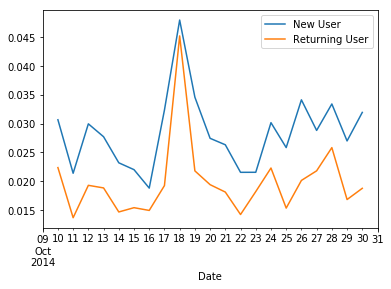

In [7]:
#User Type
Purchase_H_U_Control = data[(data.Land == 1)&(data.Purchase == 1)].groupby(['Date', 'User Type'])['Visitors_Control'].sum()
Purchase_H_U_Variant = data[(data.Land == 1)&(data.Purchase == 1)].groupby(['Date', 'User Type'])['Visitors_Variant'].sum()
P_Purchase_H_U_Control = Purchase_H_U_Control/Visitor_H_Control_date
P_Purchase_H_U_Variant = Purchase_H_U_Variant/Visitor_H_Variant_date
print ('conversion rate from returning user and New user in control group:')
print (P_Purchase_H_U_Control.unstack().describe())
print("\n")
print ('conversion rate from returning user and New user  in variant group:')
print (P_Purchase_H_U_Variant.unstack().describe())
P_Purchase_H_U_Control.unstack().plot(kind ='bar', stacked =True) 
P_Purchase_H_U_Control.unstack().plot()

P_Purchase_H_U_Variant.unstack().plot(kind ='bar', stacked =True)
P_Purchase_H_U_Variant.unstack().plot()
plt.legend()
plt.show()

The difference of the conversion rate between Variant and Control groups:
Date
2014-10-10   -0.001720
2014-10-11   -0.003140
2014-10-12   -0.002491
2014-10-13   -0.002702
2014-10-14   -0.003540
2014-10-15   -0.001982
2014-10-16   -0.001934
2014-10-17   -0.001434
2014-10-18    0.000979
2014-10-19   -0.002427
2014-10-20   -0.001753
2014-10-21   -0.002073
2014-10-22   -0.001980
2014-10-23   -0.002296
2014-10-24   -0.001447
2014-10-25   -0.004528
2014-10-26   -0.002934
2014-10-27   -0.003112
2014-10-28   -0.002275
2014-10-29   -0.001505
2014-10-30   -0.003785
dtype: float64
The margiin of two-tail(5%) of the conversion rate between Control and Variant groups:
Date
2014-10-10    0.001825
2014-10-11    0.001443
2014-10-12    0.001748
2014-10-13    0.001672
2014-10-14    0.001519
2014-10-15    0.001490
2014-10-16    0.001370
2014-10-17    0.001750
2014-10-18    0.002199
2014-10-19    0.001858
2014-10-20    0.001658
2014-10-21    0.001627
2014-10-22    0.001426
2014-10-23    0.001536
2014-10-2

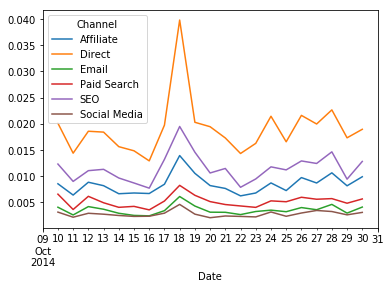

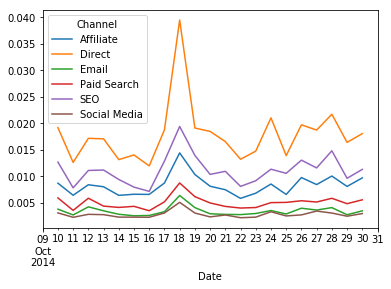

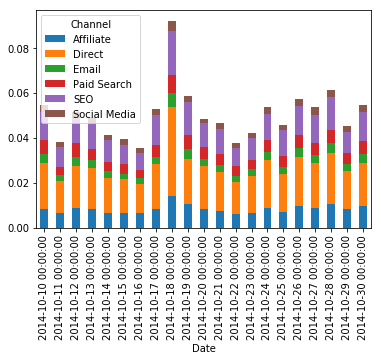

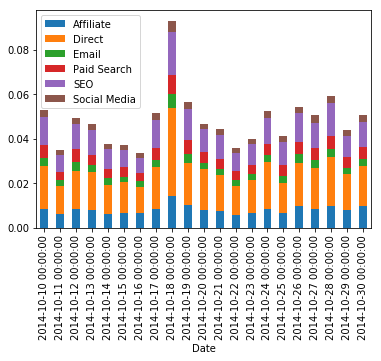

In [8]:
#Channel of purchase
Visitor_H_Control_date = data[data.Land == 1].groupby(['Date'])['Visitors_Control'].sum()
Visitor_H_Variant_date = data[data.Land == 1].groupby(['Date'])['Visitors_Variant'].sum()
Purchase_HC_Control = data[(data.Land == 1)&(data.Purchase == 1)].groupby(['Date','Channel'])['Visitors_Control'].sum()
Purchase_HC_Variant = data[(data.Land == 1)&(data.Purchase == 1)].groupby(['Date','Channel'])['Visitors_Variant'].sum()
P_Purchase_HC_Control = Purchase_HC_Control/Visitor_H_Control_date
P_Purchase_HC_Variant = Purchase_HC_Variant/Visitor_H_Variant_date
P_sumCHControlVariant = ((Purchase_HC_Control+Purchase_HC_Variant)/(Visitor_H_Control_date+Visitor_H_Variant_date))
SE_sumCHControlVariant = np.sqrt(P_sumCHControlVariant*(1.0-P_sumCHControlVariant)*(Visitor_H_Control_date+Visitor_H_Variant_date)
                               /(Visitor_H_Control_date*Visitor_H_Variant_date))
delPpool = P_Purchase_H_Variant-P_Purchase_H_Control
print ( 'The difference of the conversion rate between Variant and Control groups:')
print (delPpool)
print ( 'The margiin of two-tail(5%) of the conversion rate between Control and Variant groups:')
print (1.96*SE_sumHControlVariant)
print ( 'The defference of the real difference(Control & Variant) and margin(5% tails):')
print (-delPpool-1.96*SE_sumHControlVariant)
print ((-delPpool-1.96*SE_sumHControlVariant).describe())
#print
print ('Probility of purchase in control group:')
print (P_Purchase_HC_Control.unstack().describe())
#print ('Conversion rate in Control group:',0.05056-1.96*0.012084,'-', 0.05056+1.96*0.012084)
#print("\n")
print ('Probility of purchase in variant group:')
print (P_Purchase_HC_Variant.unstack().describe())
P_Purchase_HC_Control.unstack().plot() 
P_Purchase_HC_Variant.unstack().plot()#(kind ='bar', stacked = True)
P_Purchase_HC_Control.unstack().plot(kind ='bar', stacked = True)
P_Purchase_HC_Variant.unstack().plot(kind ='bar', stacked = True)
#print ('Conversion rate in Variant group:',0.04827-1.96*0.012715, '-',0.04827+1.96*0.012715)
plt.legend()
plt.show()

The difference of the bounce rate between Control and Variant groups:
Date
2014-10-10    0.013536
2014-10-11    0.020430
2014-10-12    0.019982
2014-10-13    0.024218
2014-10-14    0.013457
2014-10-15    0.011544
2014-10-16    0.016054
2014-10-17    0.012369
2014-10-18    0.004095
2014-10-19    0.015713
2014-10-20    0.026768
2014-10-21    0.015760
2014-10-22    0.014027
2014-10-23    0.015217
2014-10-24    0.010735
2014-10-25    0.018795
2014-10-26    0.018778
2014-10-27    0.021620
2014-10-28    0.009832
2014-10-29    0.024402
2014-10-30    0.005706
dtype: float64
The margiin of two-tail(5%) of the conversion rate between Control and Variant groups:
Date
2014-10-10    0.003921
2014-10-11    0.003834
2014-10-12    0.003915
2014-10-13    0.003851
2014-10-14    0.003858
2014-10-15    0.003865
2014-10-16    0.003739
2014-10-17    0.003807
2014-10-18    0.003443
2014-10-19    0.003849
2014-10-20    0.003796
2014-10-21    0.003857
2014-10-22    0.003751
2014-10-23    0.003861
2014-10-24   

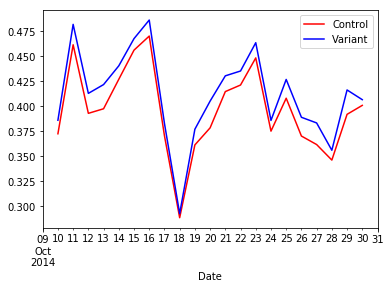

In [9]:
#Bounce rate
Visitor_H_Control_date = data[data.Land == 1].groupby('Date')['Visitors_Control'].sum()
Visitor_H_Variant_date = data[data.Land == 1].groupby('Date')['Visitors_Variant'].sum()
Bounce_H_Control = data[(data.Land == 1)&(data.Bounce == 1)].groupby(['Date'])['Visitors_Control'].sum()
Bounce_H_Variant = data[(data.Land == 1)&(data.Bounce == 1)].groupby(['Date'])['Visitors_Variant'].sum()
P_Bounce_H_Control = Bounce_H_Control/Visitor_H_Control_date
P_Bounce_H_Variant = Bounce_H_Variant/Visitor_H_Variant_date
P_sumHBControlVariant = ((Bounce_H_Control+Bounce_H_Variant)/(Visitor_H_Control_date+Visitor_H_Variant_date))
SE_sumHBControlVariant = np.sqrt(P_sumHBControlVariant*(1.0-P_sumHBControlVariant)*(Visitor_H_Control_date +Visitor_H_Variant_date)
                               /(Visitor_H_Control_date *Visitor_H_Variant_date))
delBpool = P_Bounce_H_Variant-P_Bounce_H_Control
print ( 'The difference of the bounce rate between Control and Variant groups:')
print (delBpool)
print ( 'The margiin of two-tail(5%) of the conversion rate between Control and Variant groups:')
print (1.96*SE_sumHBControlVariant)
print ( 'The defference of the real differnce and margin:')
print (delBpool-1.96*SE_sumHBControlVariant)
print ((delBpool-1.96*SE_sumHBControlVariant).describe())

print ('Bounce in control group:')
print (P_Bounce_H_Control.describe())
print ('Bounce rate in Control group:',0.3960-1.96*0.043229,'-', 0.396+1.96*0.043229)
#print("\n")
print ('Bounce rate in variant group:')
print (P_Bounce_H_Variant.describe())
P_Bounce_H_Control.plot(color='red',label='Control') 

P_Bounce_H_Variant.plot(color='blue',label ='Variant')#(kind ='bar', stacked = True)

print ('Bounce rate in Variant group:',0.41187-1.96*0.044992, '-',0.41187+1.96*0.044992)
plt.legend()
plt.show()

Total amount of Bounce in control group:
count       21.000000
mean     49188.714286
std       6653.947829
min      38635.000000
25%      43849.000000
50%      47989.000000
75%      53472.000000
max      63856.000000
Name: Visitors_Control, dtype: float64
Bounce rate in variant group:
count       21.000000
mean     52115.047619
std       7150.290816
min      39023.000000
25%      46144.000000
50%      51611.000000
75%      56601.000000
max      67398.000000
Name: Visitors_Variant, dtype: float64
count      21.000000
mean    -2926.333333
std       989.940924
min     -4374.000000
25%     -3622.000000
50%     -2893.000000
75%     -2221.000000
max      -388.000000
dtype: float64


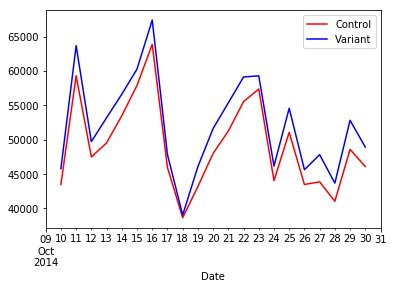

In [10]:
# aggregate amount of bounce
Visitor_H_Control_date = data[data.Land == 1].groupby('Date')['Visitors_Control'].sum()
Visitor_H_Variant_date = data[data.Land == 1].groupby('Date')['Visitors_Variant'].sum()
Bounce_H_Control = data[(data.Land == 1)&(data.Bounce == 1)].groupby(['Date'])['Visitors_Control'].sum()
Bounce_H_Variant = data[(data.Land == 1)&(data.Bounce == 1)].groupby(['Date'])['Visitors_Variant'].sum()

print ('Total amount of Bounce in control group:')
print (Bounce_H_Control.describe())

print ('Bounce rate in variant group:')
print (Bounce_H_Variant.describe())
print ((Bounce_H_Control-Bounce_H_Variant).describe())
Bounce_H_Control.plot(color='red',label='Control') 
Bounce_H_Variant.plot(color='blue',label ='Variant')
plt.legend()
plt.show()

bounce rate from returning user and New user in control group:
User Type   New User  Returning User
count      21.000000       21.000000
mean        0.235877        0.160134
std         0.027570        0.020405
min         0.180930        0.107577
25%         0.219077        0.152691
50%         0.232466        0.159452
75%         0.256020        0.165891
max         0.282576        0.205588


bounce rate from returning user and New user  in variant group:
User Type   New User  Returning User
count      21.000000       21.000000
mean        0.248232        0.163638
std         0.034296        0.016671
min         0.170508        0.122093
25%         0.221417        0.156894
50%         0.248948        0.167284
75%         0.262221        0.171623
max         0.317760        0.196146


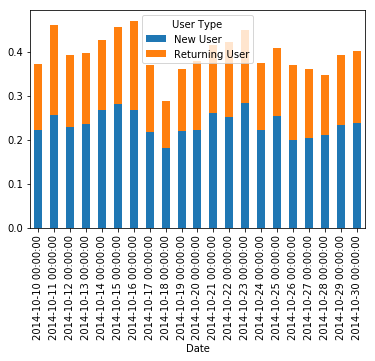

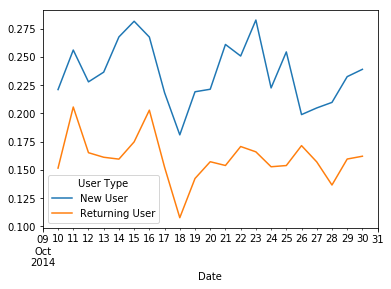

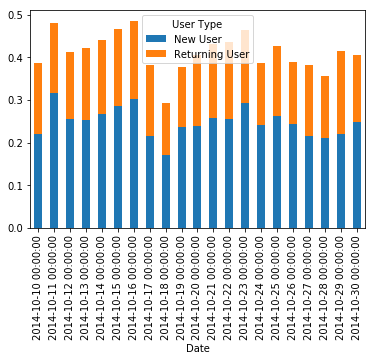

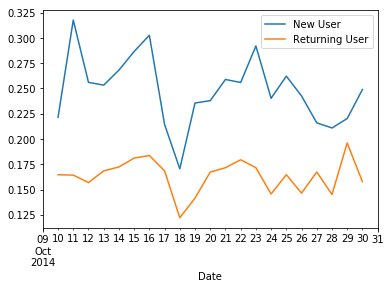

In [12]:
#User Type
Bounce_H_U_Control = data[(data.Land == 1)&(data.Bounce == 1)].groupby(['Date', 'User Type'])['Visitors_Control'].sum()
Bounce_H_U_Variant = data[(data.Land == 1)&(data.Bounce == 1)].groupby(['Date', 'User Type'])['Visitors_Variant'].sum()
P_Bounce_H_U_Control = Bounce_H_U_Control/Visitor_H_Control_date
P_Bounce_H_U_Variant = Bounce_H_U_Variant/Visitor_H_Variant_date
print ('bounce rate from returning user and New user in control group:')
print (P_Bounce_H_U_Control.unstack().describe())
print("\n")
print ('bounce rate from returning user and New user  in variant group:')
print (P_Bounce_H_U_Variant.unstack().describe())
P_Bounce_H_U_Control.unstack().plot(kind ='bar', stacked =True) 
P_Bounce_H_U_Control.unstack().plot()
P_Bounce_H_U_Variant.unstack().plot(kind ='bar', stacked =True)
P_Bounce_H_U_Variant.unstack().plot()
plt.legend()
plt.show()

The difference of the conversion rate between Variant and Control groups:
Date
2014-10-10    0.013536
2014-10-11    0.020430
2014-10-12    0.019982
2014-10-13    0.024218
2014-10-14    0.013457
2014-10-15    0.011544
2014-10-16    0.016054
2014-10-17    0.012369
2014-10-18    0.004095
2014-10-19    0.015713
2014-10-20    0.026768
2014-10-21    0.015760
2014-10-22    0.014027
2014-10-23    0.015217
2014-10-24    0.010735
2014-10-25    0.018795
2014-10-26    0.018778
2014-10-27    0.021620
2014-10-28    0.009832
2014-10-29    0.024402
2014-10-30    0.005706
dtype: float64
The margiin of two-tail(5%) of the conversion rate between Control and Variant groups:
Date        Channel     
2014-10-10  Affiliate       0.001979
            Direct          0.002872
            Email           0.001319
            Paid Search     0.001554
            SEO             0.002241
            Social Media    0.001055
2014-10-11  Affiliate       0.002070
            Direct          0.002865
            Ema

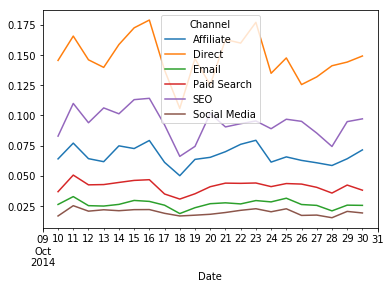

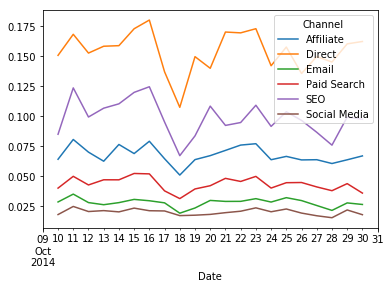

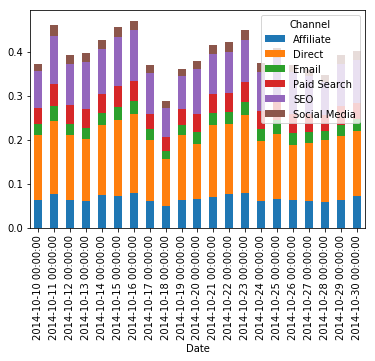

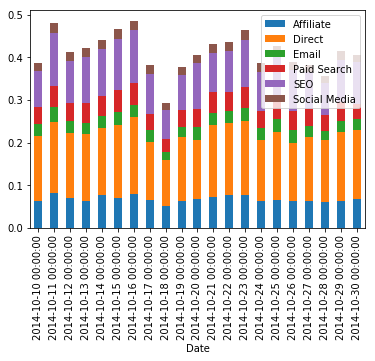

In [14]:
# Channel of bounce
Visitor_H_Control_date = data[data.Land == 1].groupby(['Date'])['Visitors_Control'].sum()
Visitor_H_Variant_date = data[data.Land == 1].groupby(['Date'])['Visitors_Variant'].sum()
Bounce_HC_Control = data[(data.Land == 1)&(data.Bounce == 1)].groupby(['Date','Channel'])['Visitors_Control'].sum()
Bounce_HC_Variant = data[(data.Land == 1)&(data.Bounce == 1)].groupby(['Date','Channel'])['Visitors_Variant'].sum()
P_Bounce_HC_Control = Bounce_HC_Control/Visitor_H_Control_date
P_Bounce_HC_Variant = Bounce_HC_Variant/Visitor_H_Variant_date
B_sumCHControlVariant = ((Bounce_HC_Control+Bounce_HC_Variant)/(Visitor_H_Control_date+Visitor_H_Variant_date))
SEB_sumCHControlVariant = np.sqrt(B_sumCHControlVariant*(1.0-B_sumCHControlVariant)*(Visitor_H_Control_date+Visitor_H_Variant_date)
                               /(Visitor_H_Control_date*Visitor_H_Variant_date))
delBCpool = P_Bounce_H_Variant-P_Bounce_H_Control
print ( 'The difference of the conversion rate between Variant and Control groups:')
print (delBCpool)
print ( 'The margiin of two-tail(5%) of the conversion rate between Control and Variant groups:')
print (1.96*SEB_sumCHControlVariant)
print ( 'The defference of the real difference(Control & Variant) and margin(5% tails):')
print (-delBCpool-1.96*SEB_sumCHControlVariant)
print ((-delBCpool-1.96*SEB_sumCHControlVariant).unstack().describe())
#print
print ('Probility of purchase in control group:')
print (P_Bounce_HC_Control.unstack().describe())
#print ('Conversion rate in Control group:',0.05056-1.96*0.012084,'-', 0.05056+1.96*0.012084)
#print("\n")
print ('Probility of purchase in variant group:')
print (P_Bounce_HC_Variant.unstack().describe())
P_Bounce_HC_Control.unstack().plot() 
P_Bounce_HC_Variant.unstack().plot()#(kind ='bar', stacked = True)
P_Bounce_HC_Control.unstack().plot(kind ='bar', stacked = True)
P_Bounce_HC_Variant.unstack().plot(kind ='bar', stacked = True)
#print ('Conversion rate in Variant group:',0.04827-1.96*0.012715, '-',0.04827+1.96*0.012715)
plt.legend()
plt.show()